In [28]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import euclidean

In [2]:
df = pd.read_csv("teams.csv", index_col="team_name")

In [8]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.arena_lat, df.arena_long), crs="EPSG:4326")

In [41]:
# Project to points in meters
gdf_m: gpd.GeoDataFrame = gdf.to_crs(crs="3857")  # type: ignore

In [67]:
from itertools import combinations

dists = [
    (
        u,
        v,
        {
            "weight": euclidean(
                np.array(gdf_m.loc[u].geometry.coords[0]),
                np.array(gdf_m.loc[v].geometry.coords[0]),
            ),
        },
    )
    for u, v in combinations(gdf.index, 2)
]


In [68]:
dists

[('Boston Celtics', 'Brooklyn Nets', {'weight': 409629.9246459014}),
 ('Boston Celtics', 'New York Knicks', {'weight': 405305.41163069}),
 ('Boston Celtics', 'Philadelphia 76ers', {'weight': 584897.4736909795}),
 ('Boston Celtics', 'Toronto Raptors', {'weight': 946027.2428195762}),
 ('Boston Celtics', 'Chicago Bulls', {'weight': 1850669.1410086765}),
 ('Boston Celtics', 'Cleveland Cavaliers', {'weight': 1190002.7947505396}),
 ('Boston Celtics', 'Detroit Pistons', {'weight': 1357161.3072480585}),
 ('Boston Celtics', 'Indiana Pacers', {'weight': 1723575.0078094883}),
 ('Boston Celtics', 'Milwaukee Bucks', {'weight': 1879061.7514232392}),
 ('Boston Celtics', 'Atlanta Hawks', {'weight': 1921227.2470348682}),
 ('Boston Celtics', 'Charlotte Hornets', {'weight': 1492654.082340911}),
 ('Boston Celtics', 'Miami Heat', {'weight': 2463220.9490898266}),
 ('Boston Celtics', 'Orlando Magic', {'weight': 2219438.072903298}),
 ('Boston Celtics', 'Washington Wizards', {'weight': 836054.8401544727}),
 ('

In [44]:
import networkx as nx

In [69]:
G = nx.Graph()
G.add_edges_from(dists)

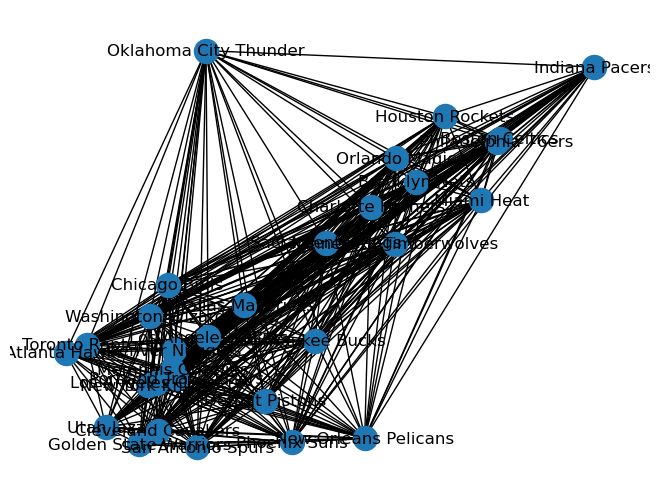

In [84]:
nx.draw(G, with_labels=True)